匯入常見套件。

In [14]:
from csv import excel

import numpy as np
import pandas as pd
import scipy.stats as stats
import statistics as st
import matplotlib.pyplot as plt

OSError: 'seaborn-white' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

## 敘述統計

使用 `pandas`。

- `sum()`：總和
- `mean()`：平均數
- `var()`：變異數
- `std()`：標準差
- `corr()`：相關係數矩陣
- `cov()`：共變異數矩陣
- `skew()`：偏度
- `kurt()`：峰態
- `describe()`：基本統計

### 圖表

| 函數名稱               | 功能             | package           |
|--------------------|----------------|-------------------|
| `plot()`           | 折線圖            | Matplotlib/Pandas |
| `pie()`            | 圓餅圖            | Matplotlib/Pandas |
| `hist()`           | 直方圖, 可顯示數據分配情形 | Matplotlib/Pandas |
| `boxplot()`        | 箱型圖            | pandas            |
| `plot(logy=True)`  | Y 軸對數圖         | pandas            |
| `plot(yerr=error)` | 誤差圖            | pandas            |



## 資料 IO

可以來自 csv、excel⋯⋯

Python 可以用 `csv.reader()` 和 `csv.DictReader()`。
Pandas 可以用 `pandas.read()` 讀成 `DataFrame` object。

Pandas 的 xlsxwriter 套件：

| 方法                     | 功能                  |
|------------------------|---------------------|
| `read_excel()`         | 開啟一個要讀取的 Excel file |
| `ExcelWriter()`        | 開啟一個要寫入的 Excel file |
| `to_excel()`           | 寫入到指定工作表            |
| `add_series()`         | 新增一組數列到統計圖物件        |
| `workbook.add_chart()` | 新增一個統計圖物件           |
| `insert_chart()`       | 插入一個統計圖物件           |
| `save()`               | 儲存試算表檔案             |
| `set_x_axis()`         | 設定 x 軸標題            |
| `set_y_axis()`         | 設定 y 軸標題            |

## 練習：股票資料

In [2]:
df1 = pd.read_excel('201738.xlsx', sheet_name='stock')
df1.columns = ['time', 'value', 'vol', 'dayvalue', 'tradeday', 'index', 'tradeperson']
df1

,time,value,vol,dayvalue,tradeday,index,tradeperson
0,87,29618.97,612.01,109.30,271,7737.68,2811785
1,88,29291.52,678.06,110.11,266,7426.69,2931608
2,89,30526.57,630.87,112.64,271,7847.21,3158011
3,90,18354.94,606.42,75.23,244,4907.43,2401775
4,91,21873.95,856.19,88.20,248,5225.61,2739204
...,...,...,...,...,...,...,...
181,10509,1299.49,32.39,68.39,19,9130.87,1100645
182,10510,1206.41,30.61,60.32,20,9273.74,1057443
183,10511,1475.40,41.75,67.06,22,9098.39,1196788
184,10512,1241.86,35.82,56.45,22,9245.26,1072236


In [3]:
print('mean =', st.mean(df1.value))
print('max =', max(df1.value))
print('min =', min(df1.value))
print('variance =', round(st.variance(df1.value), 2))
print('standard deviation =', round(st.stdev(df1.value), 2))

mean = 4100.365806451613
max = 33043.85
min = 846.03
variance = 46228800.88
standard deviation = 6799.18


In [4]:
df1.value

0      29618.97
1      29291.52
2      30526.57
3      18354.94
4      21873.95
         ...   
181     1299.49
182     1206.41
183     1475.40
184     1241.86
185     1033.49
Name: value, Length: 186, dtype: float64

In [5]:
df1[:20]

,time,value,vol,dayvalue,tradeday,index,tradeperson
0,87,29618.97,612.01,109.30,271,7737.680,2811785
1,88,29291.52,678.06,110.11,266,7426.690,2931608
2,89,30526.57,630.87,112.64,271,7847.210,3158011
3,90,18354.94,606.42,75.23,244,4907.430,2401775
4,91,21873.95,856.19,88.20,248,5225.610,2739204
5,92,20333.24,917.58,81.66,249,5161.900,2615829
6,93,23875.37,987.57,95.50,250,6033.780,3016895
7,94,18818.90,663.51,76.19,247,6092.270,2504208
8,95,23900.36,732.51,96.37,248,6842.040,2774459
9,96,33043.85,887.19,133.78,247,8509.560,3173937


In [6]:
df1.describe()

,time,value,vol,dayvalue,tradeday,index,tradeperson
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,1.860000e+02
mean,8912.408602,4100.365806,123.698441,94.828333,42.516129,7436.938245,1.416098e+06
std,2919.313410,6799.176485,203.668288,28.544886,67.450901,1356.979972,5.467693e+05
min,87.000000,846.030000,23.960000,45.450000,12.000000,4319.444000,8.293570e+05
25%,9405.250000,1519.407500,44.560000,74.787500,20.000000,6468.667500,1.100608e+06
50%,9803.500000,1873.205000,55.365000,88.260000,21.000000,7664.100000,1.236282e+06
75%,10201.750000,2627.982500,78.287500,111.292500,22.000000,8507.820000,1.504257e+06
max,10601.000000,33043.850000,1088.770000,225.020000,271.000000,9689.300000,3.362054e+06


計算峰度、偏度

In [7]:
norm = []
skew = []
kurtosis = []

for col in df1.columns:
    series = df1[col]
    st, pv = stats.normaltest(series)

    norm.append(round(pv, 10))
    skew.append(stats.skew(series))
    kurtosis.append(stats.kurtosis(series))

skdf = pd.DataFrame([norm, skew, kurtosis],
                    index=['norm', 'skew', 'kurtosis'],
                    columns=['time', 'value', 'vol', 'dayvalue', 'tradeday', 'index', 'tradeperson'])
skdf

,time,value,vol,dayvalue,tradeday,index,tradeperson
norm,0.000000,0.000000,0.000000,3.500000e-09,0.000000,0.001635,0.000000
skew,-2.639874,2.947664,3.039759,1.091416e+00,2.766818,-0.450927,2.064220
kurtosis,5.160901,7.301440,8.182855,1.866904e+00,5.729246,-0.662007,3.673059


In [8]:
skdf_merged = pd.concat([df1, skdf])

excel_writer = pd.ExcelWriter('241011-01.xlsx')
skdf_merged.to_excel(excel_writer)
excel_writer.close()

## 繪製圖形

In [28]:
# 移除不要的資料
df_cleaned = df1[df1["time"].int.len() >= 4]
df_cleaned

AttributeError: Can only use .str accessor with string values!

In [23]:
plt.plot(df_cleaned.time, df_cleaned.value, color='b')
plt.xticks(df_cleaned.time, rotation="vertical")
plt.xlabel('Time')
plt.title('Stock Exchange Rate')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'time'

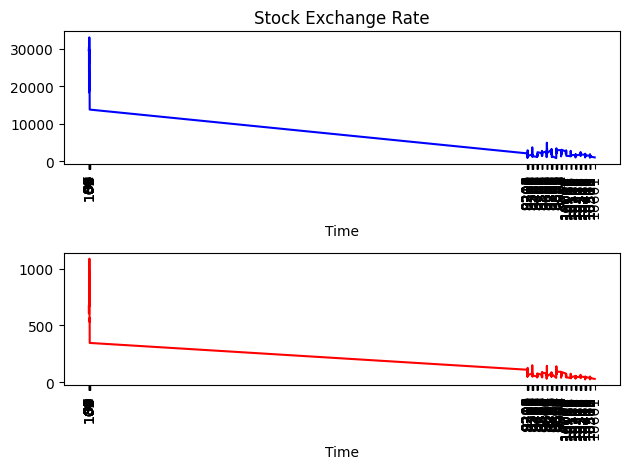

In [19]:
plt.subplot(2, 1, 1)
plt.plot(df1.time, df1.value, color='b')
plt.xticks(df1.time, rotation="vertical")
plt.xlabel('Time')
plt.title('Stock Exchange Rate')
plt.subplot(2, 1, 2)
plt.plot(df1.time, df1.vol, color='r')
plt.xticks(df1.time, rotation="vertical")
plt.xlabel('Time')
plt.tight_layout()
plt.show()
